# 데이터셋 병합
### < 데이터 >
- FER2013
- AI허브 감정 인식 데이터
  - 이미지 -> 픽셀 변환
  - FER2013과 같은 형태의 데이터프레임 생성

### < 감정 종류 >
- 화남, 당황, 불안, 행복, 슬픔, 중립
- {0:'Angry', 1:'Confusion', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Neutral'}

### 0. 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import shutil
from io import BytesIO
from PIL import Image, ImageFile
from PIL.Image import DecompressionBombError

### 1. FER2013 전처리
- Disgust(혐오), Surprise(놀람)에 해당하는 데이터 제거, 주어진 감정 코드로 다시 매핑하기
- Public Test, Private Test -> Test로 합치기

In [87]:
path = './'

In [88]:
fer2013 = pd.read_csv(path + 'fer2013.csv')

# Usage
usage_unique = fer2013['Usage'].unique()
print("Usage values:", usage_unique)

# emotion
emotion_unique = fer2013['emotion'].unique()
print("emotion values:", emotion_unique)

fer2013.head()

Usage values: ['Training' 'PublicTest' 'PrivateTest']
emotion values: [0 2 4 6 3 5 1]


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [89]:
# Usage가 PublicTest 또는 PrivateTest인 경우, Test로 변환
fer2013['Usage'] = fer2013['Usage'].replace(['PublicTest', 'PrivateTest'], 'Test')

# Usage
usage_unique = fer2013['Usage'].unique()
print("Usage values:", usage_unique)

# emotion
emotion_unique = fer2013['emotion'].unique()
print("emotion values:", emotion_unique)

fer2013.head()

Usage values: ['Training' 'Test']
emotion values: [0 2 4 6 3 5 1]


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


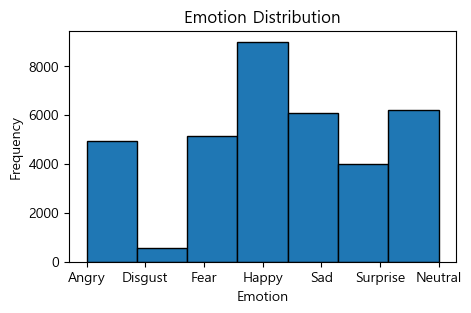

In [90]:
# 감정 매핑
emotion_mapping = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# 히스토그램 그리기
plt.figure(figsize=(5, 3))
plt.hist(fer2013["emotion"], bins=len(emotion_mapping), edgecolor="black")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Frequency")

# x축 값 매핑
plt.xticks(ticks=range(len(emotion_mapping)), labels=[emotion_mapping[i] for i in range(len(emotion_mapping))])
plt.show()

- Disgust(혐오), Surprise(놀람) 컬럼 제거
- fer2013 감정: {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [92]:
fer2013 = fer2013[fer2013["emotion"].isin([0, 2, 3, 4, 6])]
print(len(fer2013))
fer2013.head()

31338


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


- {0:'Angry', 1:'Confusion', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Neutral'} 형태로 감정 매핑

In [94]:
# 'emotion' 열에서 값이 6인 것을 5로 변경
fer2013.loc[fer2013["emotion"] == 6, "emotion"] = 5
fer2013.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,5,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


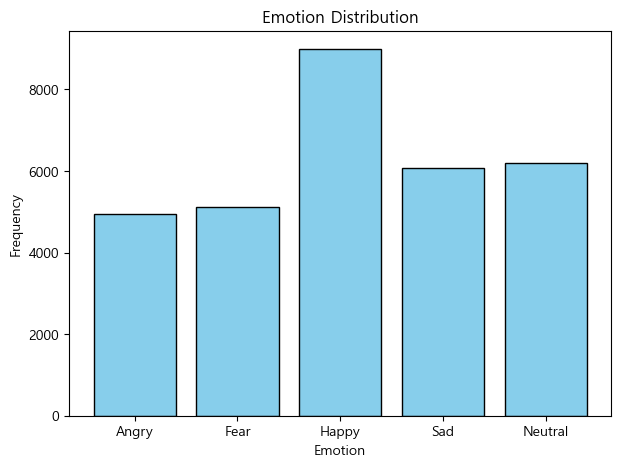

In [95]:
# 감정 매핑
emotion_mapping = {0: 'Angry', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Neutral'}

# 고유값 및 빈도 확인
emotion_counts = fer2013["emotion"].value_counts()

# 히스토그램 그리기
plt.figure(figsize=(7, 5))
plt.bar(emotion_mapping.values(), [emotion_counts.get(i, 0) for i in emotion_mapping.keys()], color='skyblue', edgecolor='black')

# 그래프 제목 및 레이블 설정
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Frequency")

plt.show()

### 2. AI 허브 데이터 이미지 -> 픽셀 변환

In [78]:
def image_to_pixels(image_file):
    try:
        img = Image.open(image_file)
        img = img.convert('L').resize((48, 48))  # 회색조로 변환하고 크기 조정
        pixel_array = np.array(img).flatten()  # 이미지를 1D 배열로 변환
        return ' '.join(map(str, pixel_array))
    except OSError as e:
        print(f"OSError: {e}. 파일을 건너뜁니다.")
        return None
    except DecompressionBombError as e:
        print(f"DecompressionBombError: {e}. 파일을 건너뜁니다.")
        return None
    except Exception as e:
        print(f"예기치 못한 오류: {e}. 파일을 건너뜁니다.")
        return None

- zip 파일 처리 후 emotion, pixels, Usage 컬럼을 가지는 df에 추가

In [58]:
def merge_zip_parts(zip_folder_path, output_zip_file):
    # 분할 ZIP 파일 목록을 정렬
    zip_parts = sorted(
        [f for f in os.listdir(zip_folder_path) if f.startswith("EMOIMG")],
        key=lambda x: int(x.split(".part")[-1])
    )

    # 병합된 ZIP 파일을 저장할 경로
    with open(output_zip_file, 'wb') as merged_zip:
        for part in zip_parts:
            part_path = os.path.join(zip_folder_path, part)
            with open(part_path, 'rb') as part_file:
                shutil.copyfileobj(part_file, merged_zip)

    print(f"병합 완료: {output_zip_file}")

# Pillow의 이미지 크기 제한 증가 또는 비활성화
Image.MAX_IMAGE_PIXELS = 50000000   # 5천만 픽셀로 제한 설정 (필요에 따라 조정 가능)

def process_zip_files_and_create_dataframe(zip_folder_path, emotion, usage):
    rows = []
    
    # ZIP 파일 목록
    zip_files = [f for f in os.listdir(zip_folder_path) if f.endswith('.zip')]
    print("ZIP 파일 목록:", zip_files)

    for zip_file in zip_files:
        zip_path = os.path.join(zip_folder_path, zip_file)
        
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # ZIP 파일 안의 모든 파일 목록
            file_names = zip_ref.namelist()
            
            for file_name in file_names:
                if file_name.endswith(('.jpg', '.png')):  # 이미지 파일 필터링
                    try:
                        # 이미지 파일을 메모리에서 열기
                        with zip_ref.open(file_name) as img_file:
                            pixels = image_to_pixels(img_file)
                            if pixels is None:  # 이미지 크기가 너무 큰 경우 처리 건너뜀
                                print(f"Warning: {file_name} is too large. Skipping.")
                                continue
                        
                            # Data info에 매핑
                            rows.append({'emotion': emotion, 'pixels': pixels, 'Usage': usage})
                    except (OSError, UnidentifiedImageError) as e:
                        # 손상된 이미지 파일 또는 읽기 실패 시 에러 출력 후 건너뜀
                        print(f"Warning: {file_name} is corrupted or unreadable. Skipping this file. Error: {e}")
                        continue

    # DataFrame 생성
    df = pd.DataFrame(rows, columns=['emotion', 'pixels', 'Usage'])
    return df

- 폴더 안에 압축 파일 풀어서 df에 추가(data 폴더에 zip 파일들을 바꾸면서 진행)

In [134]:
# ZIP 파일이 저장된 폴더 경로
zip_folder_path = path + 'data'
# 병합된 ZIP 파일을 저장할 경로
output_zip_file = path + 'merged_data/merged_data.zip'

# ZIP 파일 병합
merge_zip_parts(zip_folder_path, output_zip_file)

병합 완료: ./merged_data/merged_data.zip


In [135]:
df = process_zip_files_and_create_dataframe(path + 'merged_data', 3, 'Training')
df

ZIP 파일 목록: ['merged_data.zip']
OSError: broken data stream when reading image file. 파일을 건너뜁니다.
OSError: broken data stream when reading image file. 파일을 건너뜁니다.
OSError: broken data stream when reading image file. 파일을 건너뜁니다.
OSError: broken data stream when reading image file. 파일을 건너뜁니다.
OSError: broken data stream when reading image file. 파일을 건너뜁니다.
OSError: broken data stream when reading image file. 파일을 건너뜁니다.
OSError: broken data stream when reading image file. 파일을 건너뜁니다.


,emotion,pixels,Usage
0,3,29 31 34 30 27 31 22 26 104 77 49 40 57 69 88 ...,Training
1,3,87 76 49 41 14 15 15 15 14 13 12 11 13 12 12 1...,Training
2,3,43 43 43 44 43 39 33 34 30 31 32 33 35 36 38 3...,Training
3,3,213 203 197 158 129 170 202 211 185 155 151 76...,Training
4,3,250 247 244 242 223 210 220 200 147 107 135 17...,Training
...,...,...,...
11512,3,173 185 190 190 190 194 195 194 194 193 191 18...,Training
11513,3,108 108 111 91 61 73 153 201 184 166 144 193 1...,Training
11514,3,157 144 150 147 140 167 164 157 192 176 156 15...,Training
11515,3,71 69 70 70 71 71 73 75 75 74 75 77 74 74 74 7...,Training


In [136]:
len(df)

11517

In [137]:
# csv 파일로 저장
df.to_csv('df.csv', index=False) 

### 3. 변환한 AI 허브 데이터 개수 맞추기

In [46]:
# FER2013 감정 개수
fer2013['emotion'].value_counts()

emotion
3    8989
5    6198
4    6077
2    5121
0    4953
Name: count, dtype: int64

In [42]:
# CSV 파일이 저장된 폴더 경로
folder_path = "./중립"  # 원하는 폴더 경로로 변경하세요
output_file = "Neutral.csv"  # 합친 파일을 저장할 이름

# 폴더 내의 모든 CSV 파일 리스트 가져오기
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# 데이터프레임 리스트 생성
dataframes = []

# 각 CSV 파일을 읽어서 리스트에 추가
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# 데이터프레임들을 하나로 합치기
merged_df = pd.concat(dataframes, ignore_index=True)

# 합친 결과를 CSV 파일로 저장
merged_df.to_csv(output_file, index=False)

display(merged_df.head())
print(merged_df['emotion'].unique())

print(f"모든 CSV 파일이 성공적으로 {output_file}에 저장되었습니다!")

,emotion,pixels,Usage
0,5,88 87 86 79 75 75 77 77 75 73 74 75 77 80 83 8...,Training
1,5,155 159 206 179 182 174 154 97 128 135 178 206...,Training
2,5,228 231 232 228 223 209 190 161 121 135 97 62 ...,Training
3,5,83 87 94 85 94 89 124 193 136 127 204 195 169 ...,Training
4,5,88 90 92 67 140 145 136 125 113 97 83 77 80 89...,Training


[5]
모든 CSV 파일이 성공적으로 Neutral.csv에 저장되었습니다!


- 각 감정의 개수 확인 

In [58]:
print(f"Happy: {len(pd.read_csv("./happy.csv"))}")
print(f"Confusion: {len(pd.read_csv("./Confusion.csv"))}")
print(f"Fear: {len(pd.read_csv("./Fear.csv"))}")
print(f"Angry: {len(pd.read_csv("./Angry.csv"))}")
print(f"Sad: {len(pd.read_csv("./Sad.csv"))}")
print(f"Neutral: {len(pd.read_csv("./Neutral.csv"))}")

Happy: 58664
Confusion: 58308
Fear: 57963
Angry: 58322
Sad: 58530
Neutral: 57930


- 전체 개수 58308로 제한, FER2013은 유지
    - Happy: 49319
    - Confusion: 58308
    - Fear: 53187
    - Angry: 53355
    - Sad: 52231
    - Neutral: 52110

In [69]:
Happy = pd.read_csv("./happy.csv")
Happy = Happy.iloc[:49319]
Happy.to_csv("Happy.csv", index=False)

In [67]:
Confusion = pd.read_csv("./Confusion.csv")
Confusion = Confusion.iloc[:58308]
Confusion.to_csv("Confusion.csv", index=False)

In [71]:
Fear = pd.read_csv("./Fear.csv")
Fear = Fear.iloc[:53187]
Fear.to_csv("Fear.csv", index=False)

In [73]:
Angry = pd.read_csv("./Angry.csv")
Angry = Angry.iloc[:53355]
Angry.to_csv("Angry.csv", index=False)

In [76]:
Sad = pd.read_csv("./Sad.csv")
Sad = Sad.iloc[:52231]
Sad.to_csv("Sad.csv", index=False)

In [77]:
Neutral = pd.read_csv("./Neutral.csv")
Neutral = Neutral.iloc[:52110]
Neutral.to_csv("Neutral.csv", index=False)

### 4. 변환한 AI 허브 데이터 병합

In [80]:
# CSV 파일이 저장된 폴더 경로
folder_path = "./total"  # 원하는 폴더 경로로 변경하세요
output_file = "aihub_total.csv"  # 합친 파일을 저장할 이름

# 폴더 내의 모든 CSV 파일 리스트 가져오기
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# 데이터프레임 리스트 생성
dataframes = []

# 각 CSV 파일을 읽어서 리스트에 추가
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# 데이터프레임들을 하나로 합치기
merged_df = pd.concat(dataframes, ignore_index=True)

# 합친 결과를 CSV 파일로 저장
merged_df.to_csv(output_file, index=False)

display(merged_df.head())
print(len(merged_df))
print(merged_df['emotion'].unique())

print(f"모든 CSV 파일이 성공적으로 {output_file}에 저장되었습니다!")

,emotion,pixels,Usage
0,0,195 184 176 178 179 182 184 181 177 171 164 17...,Training
1,0,87 85 80 75 74 76 76 75 73 73 74 76 80 82 86 8...,Training
2,0,154 153 205 179 180 174 158 99 123 135 172 203...,Training
3,0,208 219 226 213 211 178 86 95 100 103 104 104 ...,Training
4,0,61 56 50 46 43 39 36 33 31 30 29 28 26 24 23 2...,Training


318510
[0 1 2 3 5 4]
모든 CSV 파일이 성공적으로 aihub_total.csv에 저장되었습니다!


### 5. FER2013 + 변환된 AI 허브 데이터

In [86]:
aihub_total = pd.read_csv("aihub_total.csv")

In [104]:
merged_df = pd.concat([aihub_total, fer2013], ignore_index=True)
merged_df['emotion'].value_counts()

emotion
0    58308
1    58308
2    58308
3    58308
5    58308
4    58308
Name: count, dtype: int64

In [106]:
merged_df.head()

,emotion,pixels,Usage
0,0,195 184 176 178 179 182 184 181 177 171 164 17...,Training
1,0,87 85 80 75 74 76 76 75 73 73 74 76 80 82 86 8...,Training
2,0,154 153 205 179 180 174 158 99 123 135 172 203...,Training
3,0,208 219 226 213 211 178 86 95 100 103 104 104 ...,Training
4,0,61 56 50 46 43 39 36 33 31 30 29 28 26 24 23 2...,Training


In [110]:
# 합친 결과를 CSV 파일로 저장
merged_df.to_csv("face_emotion.csv", index=False)